    # Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import ctypes
import random

# Cas de tests

## Régression

### Linear Simple 2D :
        Linear Model : OK
        MLP (1, 1)   : OK

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import ctypes
import random
my_lib = ctypes.CDLL(r"..\rust_lib\target\release\rust_lib.dll")

In [3]:
X = np.array([
      [1],
      [2]
],dtype=ctypes.c_float)
Y = np.array([
      [2],
      [3]
],dtype=ctypes.c_float)

nombre_colonnes_x = len(X[0])
nombre_lignex_x = len(X)
nombre_colonnes_y = len(Y[0])
nombre_lignes_y = len(Y)
X_flat = X.flatten()
Y_flat = Y.flatten()

LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y_flat))(*Y_flat)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)

X_to_predict = []

for i in range(100) :
    x_1 = random.uniform(1,2)
    # x_2 = random.random()*2 + 1
    X_to_predict.append([x_1])

X_to_predict = np.array(X_to_predict, dtype=ctypes.c_float)
X_to_predict_flat = X_to_predict.flatten()

LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict_mlp = (ctypes.c_float * len(X_to_predict_flat))(*X_to_predict_flat)
x_to_predict_ptr_mlp = ctypes.cast(x_to_predict_mlp, LP_c_float)

In [8]:
my_lib.radial_basis_function_model.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_bool,
    ctypes.c_int32,
    ctypes.c_bool,
]

my_lib.radial_basis_function_model.restype = ctypes.POINTER(ctypes.c_float)
rbf_trained_model_ptr = my_lib.radial_basis_function_model(
    x_to_predict_ptr,  # pointer_to_inputs_train : *mut f32,
    len(X),  # number_of_training_inputs : usize,
    x_to_predict_ptr_mlp,  # pointer_to_inputs_to_predict : *mut f32,
    len(X_to_predict),  # number_of_inputs_to_predict : usize,
    len(X[0]),  # dimension_of_inputs : usize,
    y_to_predict_ptr,  # pointer_to_labels : *mut f32,
    1,  # number_of_classes : usize,
    5,  # gamma : f32,
    False,  # is_classification : bool,
    100,  # number_of_clusters : usize
    False, # is_naive
)
print("coucou")
rbf_trained_model = np.ctypeslib.as_array(rbf_trained_model_ptr, (len(X_to_predict) * 1,))
print(len(rbf_trained_model))

coucou
100


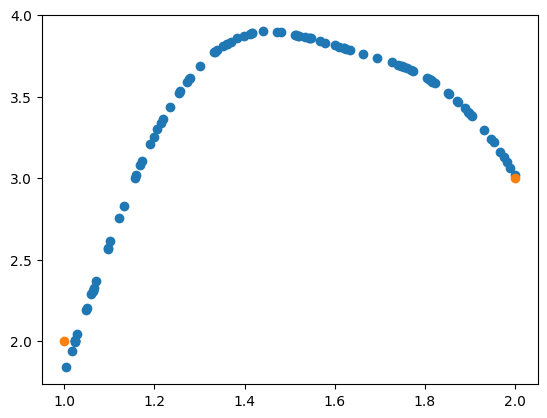

<Figure size 640x480 with 0 Axes>

In [9]:
plt.scatter(X_to_predict,rbf_trained_model)
plt.scatter(X,Y)
plt.show()
plt.clf()

### Non Linear Simple 2D :
        Linear Model    : OK
        MLP (1, ?, 1)   : OK

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import ctypes
import random
my_lib = ctypes.CDLL(r"..\rust_lib\target\release\rust_lib.dll")

X = np.array([
      [1],
      [2],
      [3]
],dtype=ctypes.c_float)
Y = np.array([
      [2],
      [3],
      [2.5]
],dtype=ctypes.c_float)

nombre_colonnes_x = len(X[0])
nombre_lignex_x = len(X)
nombre_colonnes_y = len(Y[0])
nombre_lignes_y = len(Y)
X_flat = X.flatten()
Y_flat = Y.flatten()
LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y_flat))(*Y_flat)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)

X_to_predict = []

for i in range(1000):
    x_1 = random.uniform(1.0,3.0)
    # x_2 = random.random()*2 + 1
    X_to_predict.append([x_1])

X_to_predict = np.array(X_to_predict, dtype=ctypes.c_float)
X_to_predict_flat = X_to_predict.flatten()

LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict_mlp = (ctypes.c_float * len(X_to_predict_flat))(*X_to_predict_flat)
x_to_predict_ptr_mlp = ctypes.cast(x_to_predict_mlp, LP_c_float)

In [16]:
my_lib.radial_basis_function_model.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_bool,
    ctypes.c_int32,
    ctypes.c_bool,
]

my_lib.radial_basis_function_model.restype = ctypes.POINTER(ctypes.c_float)
rbf_trained_model_ptr = my_lib.radial_basis_function_model(
    x_to_predict_ptr,  # pointer_to_inputs_train : *mut f32,
    len(X),  # number_of_training_inputs : usize,
    x_to_predict_ptr_mlp,  # pointer_to_inputs_to_predict : *mut f32,
    len(X_to_predict),  # number_of_inputs_to_predict : usize,
    len(X[0]),  # dimension_of_inputs : usize,
    y_to_predict_ptr,  # pointer_to_labels : *mut f32,
    1,  # number_of_classes : usize,
    4,  # gamma : f32,
    False,  # is_classification : bool,
    2,  # number_of_clusters : usize
    False,
)

rbf_trained_model = np.ctypeslib.as_array(rbf_trained_model_ptr, (len(X_to_predict) * 1,))
print(len(rbf_trained_model))

1000


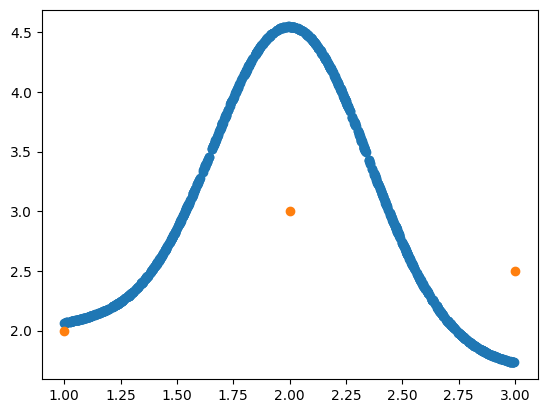

<Figure size 640x480 with 0 Axes>

In [17]:
plt.scatter(X_to_predict,rbf_trained_model)
plt.scatter(X,Y)
plt.show()
plt.clf()

### Linear Simple 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import ctypes
import random
my_lib = ctypes.CDLL(r"..\rust_lib\target\release\rust_lib.dll")

X = np.array([
      [1, 1],
      [2, 2],
      [3, 1]
],dtype=ctypes.c_float)
Y = np.array([
      [2],
      [3],
      [2.5]
],dtype=ctypes.c_float)

nombre_colonnes_x = len(X[0])
nombre_lignex_x = len(X)
nombre_colonnes_y = len(Y[0])
nombre_lignes_y = len(Y)
X_flat = X.flatten()
Y_flat = Y.flatten()
LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y_flat))(*Y_flat)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)

X_to_predict = []

for i in range(10000):
    x_1 = random.uniform(1.0,3.0)
    x_2 = random.uniform(1.0,3.0)
    X_to_predict.append([x_1,x_2])

X_to_predict = np.array(X_to_predict, dtype=ctypes.c_float)
X_to_predict_flat = X_to_predict.flatten()

LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict_mlp = (ctypes.c_float * len(X_to_predict_flat))(*X_to_predict_flat)
x_to_predict_ptr_mlp = ctypes.cast(x_to_predict_mlp, LP_c_float)

In [41]:
my_lib.radial_basis_function_model.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_bool,
    ctypes.c_int32,
]

my_lib.radial_basis_function_model.restype = ctypes.POINTER(ctypes.c_float)
rbf_trained_model_ptr = my_lib.radial_basis_function_model(
    x_to_predict_ptr,  # pointer_to_inputs_train : *mut f32,
    len(X),  # number_of_training_inputs : usize,
    x_to_predict_ptr_mlp,  # pointer_to_inputs_to_predict : *mut f32,
    len(X_to_predict),  # number_of_inputs_to_predict : usize,
    len(X[0]),  # dimension_of_inputs : usize,
    y_to_predict_ptr,  # pointer_to_labels : *mut f32,
    1,  # number_of_classes : usize,
    0.5,  # gamma : f32,
    False,  # is_classification : bool,
    len(X),  # number_of_clusters : usize
)

rbf_trained_model = np.ctypeslib.as_array(rbf_trained_model_ptr, (len(X_to_predict) * 1,))
print(len(rbf_trained_model))

10000


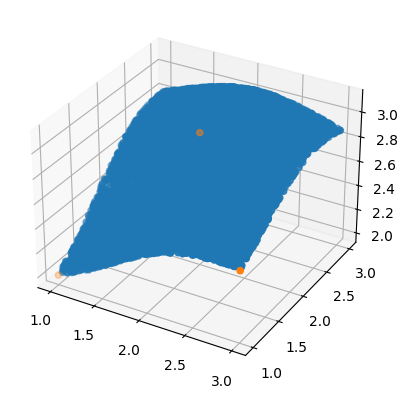

In [42]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax = Axes3D(fig)
ax.scatter(X_to_predict[:,0],X_to_predict[:,1],rbf_trained_model)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
# plt.clf()

### Linear Tricky 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import ctypes
import random
my_lib = ctypes.CDLL(r"..\rust_lib\target\release\rust_lib.dll")

X = np.array([
      [1, 1],
      [2, 2],
      [3, 3]
],dtype=ctypes.c_float)
Y = np.array([
      [1],
      [2],
      [3]
],dtype=ctypes.c_float)

nombre_colonnes_x = len(X[0])
nombre_lignex_x = len(X)
nombre_colonnes_y = len(Y[0])
nombre_lignes_y = len(Y)
X_flat = X.flatten()
Y_flat = Y.flatten()
LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y_flat))(*Y_flat)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)

X_to_predict = []

for i in range(1000):
    x_1 = random.uniform(1.0,3.0)
    x_2 = random.uniform(1.0,3.0)
    X_to_predict.append([x_1,x_2])

X_to_predict = np.array(X_to_predict, dtype=ctypes.c_float)
X_to_predict_flat = X_to_predict.flatten()

LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict_mlp = (ctypes.c_float * len(X_to_predict_flat))(*X_to_predict_flat)
x_to_predict_ptr_mlp = ctypes.cast(x_to_predict_mlp, LP_c_float)


In [48]:
my_lib.radial_basis_function_model.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_bool,
    ctypes.c_int32,
]

my_lib.radial_basis_function_model.restype = ctypes.POINTER(ctypes.c_float)
rbf_trained_model_ptr = my_lib.radial_basis_function_model(
    x_to_predict_ptr,  # pointer_to_inputs_train : *mut f32,
    len(X),  # number_of_training_inputs : usize,
    x_to_predict_ptr_mlp,  # pointer_to_inputs_to_predict : *mut f32,
    len(X_to_predict),  # number_of_inputs_to_predict : usize,
    len(X[0]),  # dimension_of_inputs : usize,
    y_to_predict_ptr,  # pointer_to_labels : *mut f32,
    1,  # number_of_classes : usize,
    0.3,  # gamma : f32,
    False,  # is_classification : bool,
    len(X),  # number_of_clusters : usize
)

rbf_trained_model = np.ctypeslib.as_array(rbf_trained_model_ptr, (len(X_to_predict) * 1,))
print(len(rbf_trained_model))

1000


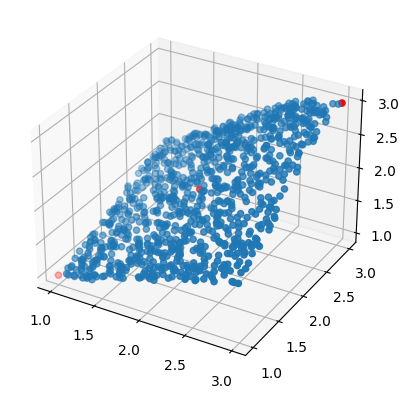

In [49]:
# from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure()
# ax = Axes3D(fig)
# ax.scatter(X[:,0],X[:,1],Y)
# plt.show()
# plt.clf()

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax = Axes3D(fig)
ax.scatter(X_to_predict[:,0],X_to_predict[:,1],rbf_trained_model)
ax.scatter(X[:,0],X[:,1],Y,c='red')
plt.show()
# plt.clf()

### Non Linear Simple 3D :
        Linear Model       : KO
        MLP (2, 2, 1)      : OK

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import ctypes
import random
my_lib = ctypes.CDLL(r"..\rust_lib\target\release\rust_lib.dll")

X = np.array([
      [1, 0],
      [0, 1],
      [1, 1],
      [0, 0],
],dtype=ctypes.c_float)
Y = np.array([
      [2],
      [1],
      [-2],
      [-1]
],dtype=ctypes.c_float)

nombre_colonnes_x = len(X[0])
nombre_lignex_x = len(X)
nombre_colonnes_y = len(Y[0])
nombre_lignes_y = len(Y)
X_flat = X.flatten()
Y_flat = Y.flatten()
LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y_flat))(*Y_flat)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)

X_to_predict = []

for i in range(10000):
    x_1 = random.uniform(0.0,1.0)
    x_2 = random.uniform(0.0,1.0)
    X_to_predict.append([x_1,x_2])

X_to_predict = np.array(X_to_predict, dtype=ctypes.c_float)
X_to_predict_flat = X_to_predict.flatten()

LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict_mlp = (ctypes.c_float * len(X_to_predict_flat))(*X_to_predict_flat)
x_to_predict_ptr_mlp = ctypes.cast(x_to_predict_mlp, LP_c_float)

In [53]:
my_lib.radial_basis_function_model.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_bool,
    ctypes.c_int32,
]

my_lib.radial_basis_function_model.restype = ctypes.POINTER(ctypes.c_float)
rbf_trained_model_ptr = my_lib.radial_basis_function_model(
    x_to_predict_ptr,  # pointer_to_inputs_train : *mut f32,
    len(X),  # number_of_training_inputs : usize,
    x_to_predict_ptr_mlp,  # pointer_to_inputs_to_predict : *mut f32,
    len(X_to_predict),  # number_of_inputs_to_predict : usize,
    len(X[0]),  # dimension_of_inputs : usize,
    y_to_predict_ptr,  # pointer_to_labels : *mut f32,
    1,  # number_of_classes : usize,
    1,  # gamma : f32,
    False,  # is_classification : bool,
    len(X),  # number_of_clusters : usize
)

rbf_trained_model = np.ctypeslib.as_array(rbf_trained_model_ptr, (len(X_to_predict) * 1,))
print(len(rbf_trained_model))

10000


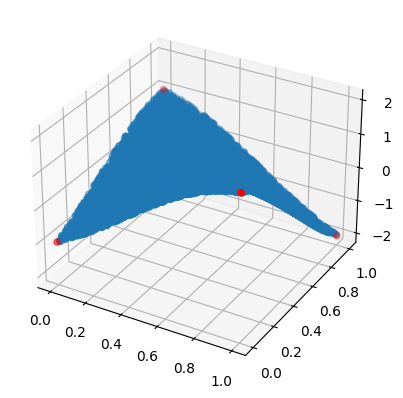

In [54]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax = Axes3D(fig)
ax.scatter(X_to_predict[:,0],X_to_predict[:,1],rbf_trained_model)
ax.scatter(X[:,0],X[:,1],Y,c='red')
plt.show()